# Lesson 11: PyLangAcq exercises

This notebook contains my solution to the exercises given in Lesson 10. This is just MY solution. People have different styles and achieve the same result in different ways. 

The exercises are:

1. Read in all transcripts with Adam, Sarah and Eve, respectively, and store each `Reader` object (an aggregated bunch of transcripts in PyLangAcq) in a variable.
1. Print it out the number of words per file for each dataset.
1. The same as above, but now only for the target child in the transcripts (e.g. only for Adam in the Adam dataset)
1. Find the most frequent words, bigrams (combination of two words in a row) and trigrams.

These first exercises can all be done by looking at the [tutorial](http://pylangacq.org/tutorial.html).

Advanced bonus exercises:

1. Calculate MLU on morpheme and word basis for each transcript. Are they correlated? Try to plot it.
1. Look at concordance for _wh_-words like _what_ and _why_ for the target children. Do they use the words as expected, i.e. fronted, and how do they structure the rest of the sentences? Are there noteworthy differences from early transcripts to later ones?

### NOTE
There were some issues with the Brown data in class 10. The reason is still not clear to me, but it might be an encoding/formatting problem in a more recent version of the data (this would also explain the decoding issues that some of you experienced). Ethan happened to have the data in what might be an older version which works. This data is retrievable from [his dropbox](kortlink.dk/23sya).

## Exercise 1: reading in the data

PyLangAcq stores transcripts in `Reader` objects containing all transcripts for e.g. Adam. This is similar to NLTK's (The Natural Language Toolkit) way of making corpus readers.

In [3]:
# first things first
import pylangacq as pla

In [4]:
# read in each folder as a Reader and store it in a variable
adam = pla.read_chat('/home/kasper/Desktop/data/Brown/Adam/*.cha')
sarah = pla.read_chat('/home/kasper/Desktop/data/Brown/Sarah/*.cha')
eve = pla.read_chat('/home/kasper/Desktop/data/Brown/Eve/*.cha')

# for us to be able to loop over them later, we can store them in a dict
data = {'adam': adam, 'sarah': sarah, 'eve': eve}

In [5]:
# if we check the type of one of the objects, we see that it is a Reader object
type(adam)

pylangacq.chat.Reader

### A slightly advanced solution

In the above code, I copy-pasted the lines that read in the transcripts. As I've said before: as soon as you find yourself copy-pasting code, there's probably a smarter way. 

And there is, maybe there's also one even smarter than this which I do not know of. I will use the `walk` function from the `os` module which traverses a directory tree. For each subdirectory, I'll check if it contains .cha files. If so, I'll save the path for later.

This also makes it very easy to add other data. For fun, I have added some other data from CHILDES: Kuczaj.

In [6]:
import os

data_paths = {}

# traverse a data folder with subfolders; get all folders containing .cha files
for path, dirnames, filenames in os.walk('/home/kasper/Desktop/data'):
    if filenames:  # if the filenames list is not empty
        # check if it contains at least one .cha file
        # if so, add it to datapaths with the directory name
        for filename in filenames:
            if '.cha' in filename:
                name = os.path.basename(path)  # just the folder name
                data_paths[name] = path
                break  # when the first has been seen, just stop

Let's see what we ended up with:

In [7]:
data_paths

{'Adam': '/home/kasper/Desktop/data/Brown/Adam',
 'Eve': '/home/kasper/Desktop/data/Brown/Eve',
 'Kuczaj': '/home/kasper/Desktop/data/Kuczaj',
 'Sarah': '/home/kasper/Desktop/data/Brown/Sarah'}

Now, for each path, I'll load in a `Reader` object tied with its dictionary key.

In [8]:
# note: this takes some time
data = {name: pla.read_chat(path + '/*.cha')
        for name, path in data_paths.items()}

## Exercise 2: print number of words per dataset

First, I'll show how this is done for just one dataset. Let's do it for our favourite child: Adam. Then, we can just change the variable names and do it for the other datasets.

But, remember that as soon as we know how to do something for _one_ thing, it can typically be done for an infinite number of things with a _for_-loop. This solution is presented further down.

In [9]:
words_by_files = adam.words(by_files=True)  # a dict with filenames as keys
print('File\t\tWords')  # header
print('-'*25)
for filename in sorted(adam.filenames()):
    basename = os.path.basename(filename)  # short name
    n_words = len(words_by_files[filename])  # n words for that filename
    print(basename, n_words, sep='\t')

File		Words
-------------------------
adam01.cha	6313
adam02.cha	7581
adam03.cha	5429
adam04.cha	4430
adam05.cha	5387
adam06.cha	4576
adam07.cha	5633
adam08.cha	4840
adam09.cha	5776
adam10.cha	6121
adam11.cha	5771
adam12.cha	5133
adam13.cha	3892
adam14.cha	4311
adam15.cha	4849
adam16.cha	4295
adam17.cha	6521
adam18.cha	6606
adam19.cha	8330
adam20.cha	7871
adam21.cha	6466
adam22.cha	6534
adam23.cha	7615
adam24.cha	6352
adam25.cha	7621
adam26.cha	7385
adam27.cha	7841
adam28.cha	7292
adam29.cha	7399
adam30.cha	7706
adam31.cha	6391
adam32.cha	7206
adam33.cha	5503
adam34.cha	6029
adam35.cha	6983
adam36.cha	7521
adam37.cha	7677
adam38.cha	6787
adam39.cha	5413
adam40.cha	6282
adam41.cha	5910
adam42.cha	6400
adam43.cha	8988
adam44.cha	6160
adam45.cha	6544
adam46.cha	6621
adam47.cha	7102
adam48.cha	6182
adam49.cha	6911
adam50.cha	6732
adam51.cha	5358
adam52.cha	5907
adam53.cha	6745
adam54.cha	8368
adam55.cha	8869


### With a for loop for all data
Now, generalize and do it for all our data.

In [10]:
for name, reader in data.items():
    print('Number of words per file for:', name)
    words_by_files = reader.words(by_files=True)
    print('File\t\tWords')
    print('-'*25)
    for filename in sorted(reader.filenames()):
        basename = os.path.basename(filename)
        n_words = len(words_by_files[filename])
        print(basename, n_words, sep='\t')
    print()  # space in output

Number of words per file for: Sarah
File		Words
-------------------------
sarah001.cha	778
sarah002.cha	1871
sarah003.cha	2576
sarah004.cha	946
sarah005.cha	1733
sarah006.cha	1918
sarah007.cha	2522
sarah008.cha	2201
sarah009.cha	2062
sarah010.cha	2580
sarah011.cha	1735
sarah012.cha	2533
sarah013.cha	1883
sarah014.cha	1206
sarah015.cha	1518
sarah016.cha	1214
sarah017.cha	3182
sarah018.cha	3087
sarah019.cha	731
sarah020.cha	2279
sarah021.cha	2784
sarah022.cha	1317
sarah023.cha	2256
sarah024.cha	1946
sarah025.cha	1917
sarah026.cha	2273
sarah027.cha	2169
sarah028.cha	2417
sarah029.cha	2509
sarah030.cha	6592
sarah031.cha	2426
sarah032.cha	2866
sarah033.cha	1428
sarah034.cha	1974
sarah035.cha	3331
sarah036.cha	2301
sarah037.cha	3929
sarah038.cha	1847
sarah039.cha	1619
sarah040.cha	2266
sarah041.cha	2080
sarah042.cha	2234
sarah043.cha	2334
sarah044.cha	2675
sarah045.cha	2559
sarah046.cha	2433
sarah047.cha	2817
sarah048.cha	2603
sarah049.cha	2703
sarah050.cha	2647
sarah051.cha	2517
sarah052.ch

## Exercise 3: number of words for the target child only

So, we have the code already, but just need to change it a bit to get words only for the target child. This is done with the __keyword argument__ `participant`. We tell the function that we only want words for the participant with the namecode `CHI`.

The only thing that needs to be changed is this line:

```python
words_by_files = reader.words(by_files=True)
```

Which should contain the keyword argument like this:

```python
words_by_files = reader.words(by_files=True, participant='CHI')
```

In [11]:
for name, reader in data.items():
    print('Number of words per file for:', name)
    words_by_files = reader.words(by_files=True, participant='CHI')
    print('File\t\tWords')
    print('-'*25)
    for filename in sorted(reader.filenames()):
        basename = os.path.basename(filename)
        n_words = len(words_by_files[filename])
        print(basename, n_words, sep='\t')
    print()  # space in output

Number of words per file for: Sarah
File		Words
-------------------------
sarah001.cha	282
sarah002.cha	772
sarah003.cha	903
sarah004.cha	295
sarah005.cha	393
sarah006.cha	588
sarah007.cha	674
sarah008.cha	897
sarah009.cha	510
sarah010.cha	932
sarah011.cha	707
sarah012.cha	664
sarah013.cha	676
sarah014.cha	480
sarah015.cha	766
sarah016.cha	369
sarah017.cha	1006
sarah018.cha	1207
sarah019.cha	248
sarah020.cha	677
sarah021.cha	998
sarah022.cha	436
sarah023.cha	702
sarah024.cha	832
sarah025.cha	799
sarah026.cha	1260
sarah027.cha	644
sarah028.cha	991
sarah029.cha	654
sarah030.cha	1639
sarah031.cha	559
sarah032.cha	1108
sarah033.cha	570
sarah034.cha	681
sarah035.cha	891
sarah036.cha	894
sarah037.cha	1589
sarah038.cha	607
sarah039.cha	535
sarah040.cha	1314
sarah041.cha	871
sarah042.cha	935
sarah043.cha	754
sarah044.cha	1094
sarah045.cha	815
sarah046.cha	976
sarah047.cha	959
sarah048.cha	1002
sarah049.cha	1088
sarah050.cha	1095
sarah051.cha	834
sarah052.cha	692
sarah053.cha	1409
sarah054.cha	

## Exercise 4: most frequent uni-, bi- and trigrams

In case you don't know what a bigram is: a bigram is simply a sequence of two words. This is generalized to the term _n_-gram, thus 1-gram (=unigram), 2-gram (=bigram), 3-gram (=trigram), 4-gram etc. _n_-grams are very important in natural language processing in general. The reason that they are interesting is that they tell us about co-occurrences of words. If we only work with single tokens/unigrams, we ignore the fact that language is linear and that words occur in meaningful sequences.

_n_-grams are simply retrieved with the `.word_ngrams()` method from `Reader` objects.

Let's jump right into the generalizable and efficient solution:

In [12]:
for name, reader in data.items():
    print('Most n-grams in:', name)
    for n in range(1, 4): # = 1, 2, 3
        ngrams = reader.word_ngrams(n)
        print(str(n) + '-grams: ', ngrams.most_common(5))
    print()  # space in output

Most n-grams in: Sarah
1-grams:  [('.', 57750), ('?', 22882), ('you', 11302), ('I', 8534), ('a', 8024)]
2-grams:  [(('yeah', '.'), 2599), (('huh', '?'), 1779), (('it', '.'), 1739), (('what', '?'), 1554), (('no', '.'), 1208)]
3-grams:  [(('I', "don't", 'know'), 465), (('is', 'it', '?'), 318), (("what's", 'that', '?'), 285), (("don't", 'know', '.'), 279), (('what', 'do', 'you'), 250)]

Most n-grams in: Eve
1-grams:  [('.', 20130), ('?', 6358), ('you', 3695), ('the', 2524), ('it', 2365)]
2-grams:  [(('it', '.'), 705), (('that', '?'), 619), (('what', '?'), 560), (('yeah', '.'), 510), (('there', '.'), 471)]
3-grams:  [(("that's", 'right', '.'), 178), (('what', 'are', 'you'), 160), (('is', 'that', '?'), 134), (('do', 'you', 'want'), 123), (("what's", 'that', '?'), 116)]

Most n-grams in: Adam
1-grams:  [('.', 49096), ('?', 22259), ('you', 11354), ('I', 9466), ('it', 7573)]
2-grams:  [(('it', '.'), 1908), (('do', 'you'), 1622), (('that', '?'), 1538), (('what', '?'), 1350), (('I', "don't"), 13

Since punctuation is pretty frequent, they tend to sneak in at the top. The same goes for so-called stopwords (function words, basically). Here, I've added an option to filter out the ones containing punctuation and adding it to a new `Counter` object (which is what is returned with the `.word_ngrams()` method). It is also doable with stopwords in a similar manner.

If you want to try doing that, there is a list of stopwords in the `NLTK` module which you can install with `pip`.

In [13]:
from collections import Counter

filter_punctuation = True

for name, reader in data.items():
    print('Most n-grams in:', name)
    for n in range(1, 4): # = 1, 2, 3
        ngrams = reader.word_ngrams(n)
        if filter_punctuation:
            ngrams = Counter({ngram: count for ngram, count in ngrams.items()
                              if not ngram[-1] in '.?!'})
        print(str(n) + '-grams: ', ngrams.most_common(5))
    print()  # space in output

Most n-grams in: Sarah
1-grams:  [('you', 11302), ('I', 8534), ('a', 8024), ('the', 7882), ('it', 6502)]
2-grams:  [(('do', 'you'), 981), (('I', "don't"), 901), (('in', 'the'), 769), (('I', 'want'), 657), (('you', 'know'), 623)]
3-grams:  [(('I', "don't", 'know'), 465), (('what', 'do', 'you'), 250), (('what', 'is', 'it'), 200), (('why', "don't", 'you'), 193), (('what', 'are', 'you'), 169)]

Most n-grams in: Eve
1-grams:  [('you', 3695), ('the', 2524), ('it', 2365), ('a', 2323), ('I', 2098)]
2-grams:  [(('in', 'the'), 439), (('on', 'the'), 429), (('are', 'you'), 333), (('do', 'you'), 296), (('no', '‡'), 287)]
3-grams:  [(('what', 'are', 'you'), 160), (('do', 'you', 'want'), 123), (('what', 'is', 'that'), 114), (('are', 'you', 'doing'), 98), (('would', 'you', 'like'), 89)]

Most n-grams in: Adam
1-grams:  [('you', 11354), ('I', 9466), ('it', 7573), ('a', 7562), ('the', 7231)]
2-grams:  [(('do', 'you'), 1622), (('I', "don't"), 1334), (('what', 'is'), 1122), (('is', 'that'), 969), (('you',

## Advanced exercise 1: correlation between word and morpheme MLU?

This is the only advanced exercise where I'll give my solution since the second requires more qualitive inspection.

Basically, we want one list of word MLU's and another list of morpheme MLU's. Then, with two numbers, we can make these points in a plot. If they form a nice, coherent line, they are correlated. If they are all over the place, they aren't correlated, which means that the measures are very different.

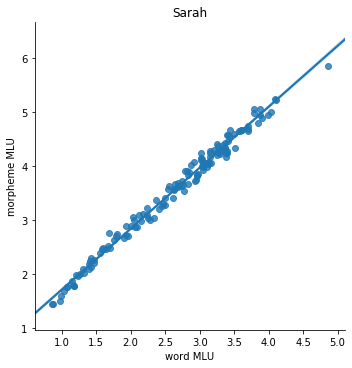

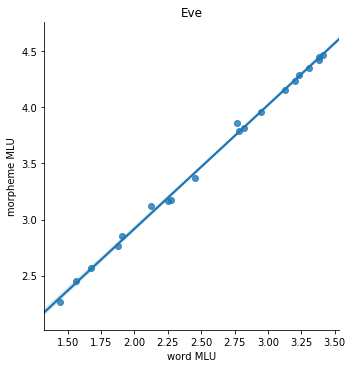

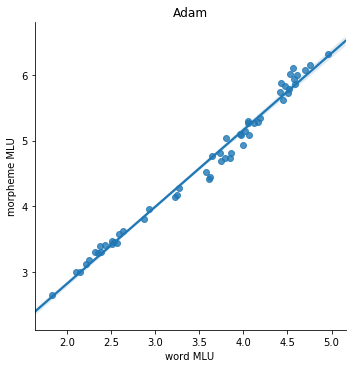

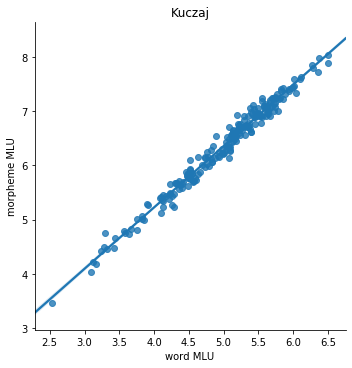

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

for name, reader in data.items():
    df = pd.DataFrame({
        'word MLU': reader.MLUw(participant='CHI'),
        'morpheme MLU': reader.MLUm(participant='CHI')
    })
    sns.lmplot(x='word MLU', y='morpheme MLU', data=df)
    # seaborn is based on matplotlib,
    # but does not provide a nice way of adding titles, legends etc.
    # therefore, this can be done directly from matplotlib
    plt.title(name)  

So, it seems that they are correlated. That is probably the case since we're working with English which is highly isolating. What would we imagine that it looks like for other languages with a richer morphology?

Word MLU tends to score lower, though, suggesting that there is some morphological richness captured by the morpheme MLU.

Extra: if you're really good, you retrieve an $R^2$ score or Pearson's correlation coefficient to get an actual numerical value of the correlation rather than eyeballing it.